## Statistical Inference on Categorical Data
In this Notebook, we will work on more statisical inference, focusing primarily on categorical data. The first two parts of this Notebook is mostly adopted from the [Inferential Statistics](https://www.coursera.org/learn/inferential-statistics-intro/home/welcome) course of Duke University, converted from R to Python and tweaked to match the needs of our CSMODEL course.

Our Notebooks in CSMODEL are designed to be guided learning activities. To use them, simply through the cells from top to bottom, following the directions along the way. If you find any unclear parts or mistakes in the Notebooks, kindly raise your concerns in the Discussion forums in our AnimoSpace or email me at thomas.tiam-lee@dlsu.edu.ph.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import chi2_contingency

## Atheism Survey

In August of 2012, news outlets ranging from the [Washington Post](http://www.washingtonpost.com/national/on-faith/poll-shows-atheism-on-the-rise-in-the-us/2012/08/13/90020fd6-e57d-11e1-9739-eef99c5fb285_story.html) to the [Huffington Post](http://www.huffingtonpost.com/2012/08/14/atheism-rise-religiosity-decline-in-america_n_1777031.html) ran a story about the rise of atheism in America. The source for the story was a poll that asked people, "Irrespective of whether you attend a place of worship or not, would you say you are a religious person, not a religious person or a convinced atheist?" This type of question, which asks people to classify themselves in one way or another, is common in polling and generates categorical data. In this lab we take a look at the atheism survey and explore what's at play when making inference about population proportions using categorical data.

Let us load the data:

The press release for the poll, conducted by WIN-Gallup International, can be accessed [here](https://www.scribd.com/document/136318147/Win-gallup-International-Global-Index-of-Religiosity-and-Atheism-2012).

**Question:** How many people were interviewed for this survey, and which methods were used?

- A total of 51,927 people globally were interviewed for the survey. About 1000 men and women were sampled from each country, and the methods varied from nation to nation, including: face-to-face (35 countries; n = 33,890), telephone (11 countries; n = 7,661), and online (11 countries; n = 10, 376).

Turn your attention to Table 6 in the press release (pages 15 and 16), which reports the sample size and response percentages for all 57 countries. While this is a useful format to summarize the data, we will base our analysis on the original data set of individual responses to the survey. Let us load that dataset:

In [2]:
atheism_df = pd.read_csv("./atheism.csv")
atheism_df.head()

,nationality,response,year
0,Afghanistan,non-atheist,2012
1,Afghanistan,non-atheist,2012
2,Afghanistan,non-atheist,2012
3,Afghanistan,non-atheist,2012
4,Afghanistan,non-atheist,2012


**Question:** What does each observation in the dataset represent?

- Each observation represents a person surveyed by the organization, indicating their nationality, their religiosity in terms of their theism or lack thereof, and the year they were surveyed.

To investigate the link between these two ways of organizing this data, take a look at the estimated proportion of atheists in the United States. Towards the bottom of Table 6, we see that this is 5%. We should be able to come to the same number using the `atheism` data.

Let us create a new data frame containing only the rows in `atheism` associated with respondents to the 2012 survey from the United States.

In [3]:
us12 = atheism_df[(atheism_df["year"] == 2012) &
                             (atheism_df["nationality"] == "United States")]
len(us12)

1002

**Practice!** Next, calculate the proportion of atheist responses in the United States in 2012, i.e. in `us12`.

In [4]:
# Write your code here
prop = len(us12[us12["response"] == "atheist"]) / len(us12)
prop

0.0499001996007984

**Question:** What is the proportion? How does it compare with the proportion presented in Table 6?

- Based on the calculation, the proportion is about 4.99%, which only differs slightly from the potentially rounded up value of 5% found in Table 6.

### Inference on Survey Data

The statistics we compute from our dataset are **sample statistics**. What we'd like, though, is insight into the population **population parameters**. You answer the question, "What proportion of people in your sample reported being atheists?" with a statistic; while the question "What proportion of people on earth would report being atheists" is answered with an estimate of the parameter.

The inferential tools for estimating population proportion are analogous to those used for means in the previous Notebook: the confidence interval and the hypothesis test.

**Question:** What are the conditions for inference to construct a 95% confidence interval for the proportion of atheists in the United States in 2012. Are you confident all conditions are met? Explain.

- One can say that all conditions are met to construct a 95% confidence interval on the said proportion. First, the dataset as a whole was sampled randomly. Second, the observations are independent from each other. Third, the observed size of atheists in 2012 in the United States is sufficient, because the sample size of the United States 2012 surveyees is 1,002, and considering the 5% atheist size, this puts the number at around 50~, well above the rule of thumb of 30. Lastly, both sides of the proportion have sample sizes greater than 10, with atheist Americans comprising of around 50, and the rest, around 940.

**Practice!** Construct a 95% confidence interval for the proportion of atheists in United States in 2012. Report the result as:

$$proportion \pm margin of error\%$$

In [5]:
# Write your codes here
z_star = norm.ppf(0.975)
z_star

1.959963984540054

In [6]:
# standard error
se = np.sqrt(prop * (1 - prop) / len(us12))
se

0.006878629122390021

In [7]:
moe = z_star * se
moe

0.0134818653428928

- 0.0499001996007984 +/- 0.0134818653428928

Although formal confidence intervals and hypothesis tests don't show up in the report, suggestions of inference appear at the bottom of page 7: "In general, the error margin for surveys of this kind is $\pm$ 3-5% at 95% confidence."

## How Does the Proportion Affect the Margin of Error?

Imagine you've set out to survey 1000 people on two questions: are you female? and are you left-handed? Since both of these sample proportions were calculated from the same sample size, they should have the same margin of error, right? Wrong!  While the margin of error does change with sample size, it is also affected by the proportion.

Think back to the formula for the standard error: $SE = \sqrt{p(1-p)/n}$. This is then used in the formula for the margin of error for a 95% confidence interval: $ME = 1.96\times SE = 1.96\times\sqrt{p(1-p)/n}$. Since the population proportion $p$ is in this $ME$ formula, it should make sense that the margin of error is in some way dependent on the population proportion. We can visualize this relationship by creating a plot of $ME$ vs. $p$.

The first step is to make a vector `p` that is a sequence from $0$ to $1$ with each number separated by $0.01$. We can then create a vector of the margin of error (`me`) associated with each of these values of `p` using the familiar approximate formula ($ME = 1.96 \times SE$).

In [8]:
d = pd.DataFrame(np.arange(0.0, 1.01, 0.01), columns = ['p'])
n = 1000
d["ME"] = 1.96 * np.sqrt(d["p"] * (1 - d["p"]) / n)
d

,p,ME
0,0.00,0.000000
1,0.01,0.006167
2,0.02,0.008677
3,0.03,0.010573
4,0.04,0.012146
...,...,...
96,0.96,0.012146
97,0.97,0.010573
98,0.98,0.008677
99,0.99,0.006167


Then, we plot the relationship.

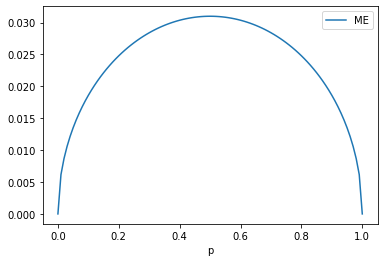

In [9]:
d.plot(x = "p", y = "ME")
plt.show()

**Question:** Describe the relationship between the sample probability and the margin of error. Why do you think this is the case?

- The margin of error is at its minimum when the proportion is totally skewed one way or another. However, as it approaches equality from left or right, it approaches its maximum, which is about 0.030 when p = 0.5. The reason for this trend might be because as the proportion increases, the number of proportion intervals increases as well, and thus, increasing the margin of error.

## Behavioral Survey Data

Next, we will look at behaviorial survey data. The Behavioral Risk Factor Surveillance System (BRFSS) is an annual telephone survey of 350,000 people in the United States collected by the Centers for Disease Control and Prevention (CDC). As its name implies, the BRFSS is designed to identify risk factors in the adult population and report emerging health trends. For example, respondents are asked about their diet and weekly physical activity, their HIV/AIDS status, possible tobacco use, and even their level of healthcare coverage. The [BRFSS Web site](https://www.openintro.org/redirect.php?go=cdc_data_brfss&referrer=data_set_page) contains a complete description of the survey, the questions that were asked and even research results that have been derived from the data.

This data set is a random sample of 20,000 people from the BRFSS survey conducted in 2000. While there are over 200 questions or variables in this dataset, the one will we will use in this Notebok only includes 3 variables.

In [10]:
cdc_df = pd.read_csv("./cdcpartial.csv")
cdc_df.head()

,genhlth,smoke100,exerany
0,good,0,0
1,good,1,0
2,good,1,1
3,good,0,1
4,very good,0,0


The variables in this Notebook are as follows:

- **genhlth.** A categorical vector indicating general health, with categories excellent, very good, good, fair, and poor.
- **smoke100.** A categorical vector, 1 if the respondent has smoked at least 100 cigarettes in their entire life and 0 otherwise.
- **exerany.** A categorical vector, 1 if the respondent exercised in the past month and 0 otherwise.

### Inference Using Chi-Square

Let's try to compare the general health of people who have exercised in the past month against people who have not exercised in the past month.

First, we count the number of people in each group for each general health level.

In [11]:
counts = cdc_df.groupby("exerany")["genhlth"].value_counts()
counts

exerany  genhlth  
0        good         1731
         very good    1352
         fair          857
         excellent     762
         poor          384
1        very good    5620
         good         3944
         excellent    3895
         fair         1162
         poor          293
Name: genhlth, dtype: int64

At first glance, it appears that people who have exercised in the past month has better general health. But we do not know if this difference is statistically significant, or just a result of a sampling error.

We will use a Chi-square test to determine whether there is a difference between the two groups, in terms of the distribution of their responses.

First, we need to convert our counts into a table format. We will create a new DataFrame for this.

In [12]:
table = pd.DataFrame([counts[0], counts[1]], index=["no exercise", "exercise"]).transpose()
table

,no exercise,exercise
good,1731,3944
very good,1352,5620
fair,857,1162
excellent,762,3895
poor,384,293


We then use the `chi2_contingency` function from SciPy to perform a Chi-Square test on this table. This function will automatically perform the necessary steps for a Chi-Square test:

- Compute the expected values for each cell under the null hypothesis
- Compute the Chi-Square statistic
- Compute the $p$-value of the statistic based on the Chi-Square distribution with the appropriate degrees of freedom

In [13]:
chi2_contingency(table)

(1070.8127561645524,
 1.6049383557705677e-230,
 4,
 array([[1443.1525, 4231.8475],
        [1772.9796, 5199.0204],
        [ 513.4317, 1505.5683],
        [1184.2751, 3472.7249],
        [ 172.1611,  504.8389]]))

**Question:** What is the $p$-value and what can we conclude from it?

- The p-value was calculated as 1.6049383557705677e-230. When that value is evaluated, it is less than 0.05, which is a signal to reject the null hypothesis. This means there is a relationship in the categorical values. This also means that there is indeed a difference in the health between those who exercised regularly in the past month and those who didn't.

### Try it Yourself

**Practice!** Compare the general health of people who have smoked at least 100 cigarettes in their lifetime against those who have not.

In [14]:
# Write your codes here. You may add addiitional cells as needed.
smokes = cdc_df.groupby("smoke100")["genhlth"].value_counts()
table2 = pd.DataFrame([smokes[0], smokes[1]], index=["no smoke", "smoke"]).transpose()
table2

,no smoke,smoke
very good,3758,3214
excellent,2879,1778
good,2782,2893
fair,911,1108
poor,229,448


In [15]:
chi2_contingency(table2)

(333.5253231905418,
 6.318174106818791e-71,
 4,
 array([[3680.8674 , 3291.1326 ],
        [2458.66315, 2198.33685],
        [2996.11625, 2678.88375],
        [1065.93105,  953.06895],
        [ 357.42215,  319.57785]]))

**Question:** What are you findings?

- The p-value was calculated as 6.318174106818791e-71. When evaluated, this is less than 0.05, so we can reject the null hypothesis. This means that there is a difference in the health between constant smokers and non-smokers in the past year.